In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid') # sns 스타일 변경

In [6]:
data = sns.load_dataset('titanic') # seaborn에 있는 타이타닉 데이터셋을 가져옴

In [7]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
data.dropna().describe() # 결측치를 없애주고 describe함

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [11]:
data.var() # var => 불편향분산을 의미함.

C:\Users\user\AppData\Local\Temp\ipykernel_19632\445316826.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.var()


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [12]:
data.mad() # mad => 평균절대편차를 의미함. 평균절대편차는 각 측정값과 평균 사이의 거리의 평균

C:\Users\user\AppData\Local\Temp\ipykernel_19632\376735895.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  data.mad()


survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [13]:
data.groupby('class').count() # 클래스별로 묶어서 탑승,나이, 생존여부 등을 확인해본다.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


<Axes: xlabel='count', ylabel='class'>

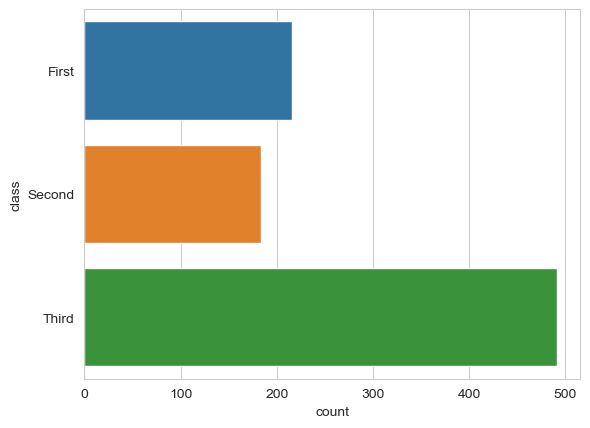

In [14]:
sns.countplot(y = 'class', data = data)

<Axes: xlabel='count', ylabel='sex'>

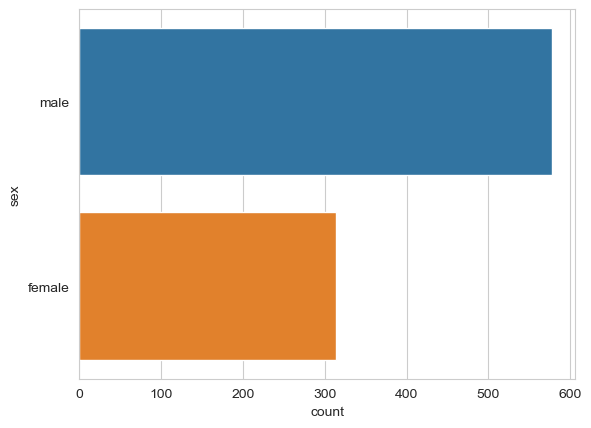

In [15]:
sns.countplot(y = 'sex', data = data) # 성별을 기준으로 봄

<Axes: xlabel='count', ylabel='alive'>

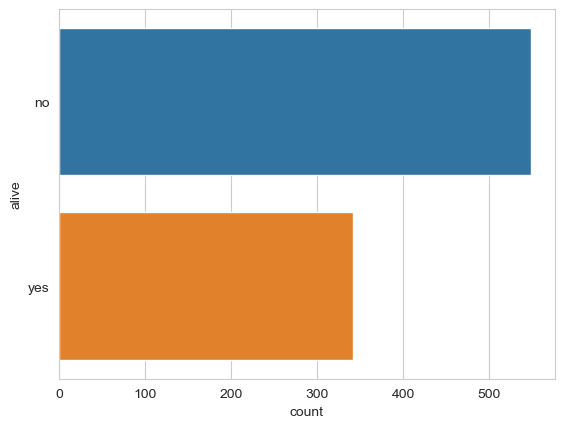

In [16]:
sns.countplot(y = 'alive', data = data) # 생존여부를 확인함.

<Axes: xlabel='count', ylabel='alone'>

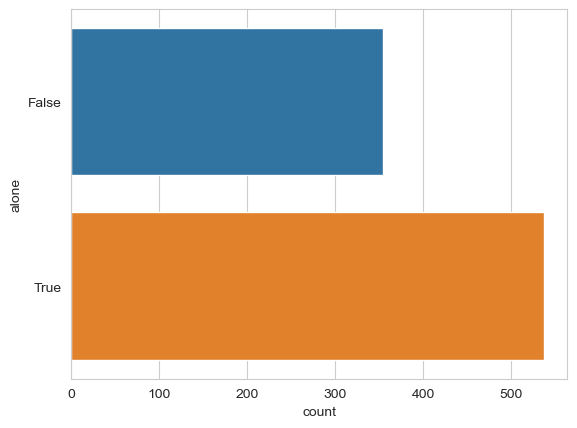

In [17]:
sns.countplot(y = 'alone', data = data) # 혼자 온 사람을 기준으로 봄 (혼자오면 T, 아니면 F)

In [19]:
data.groupby('class').std() # std => 분포값

C:\Users\user\AppData\Local\Temp\ipykernel_19632\4136949706.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('class').std()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [20]:
data.groupby('class')['fare'].median() # 클래스별 운임비용의 중앙값을 봄

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [23]:
data.query("alive == 'yes'").count() # 질의(query)를 날려서 생존한 사람의 숫자를 찾는 작업

survived       342
pclass         342
sex            342
age            290
sibsp          342
parch          342
fare           342
embarked       340
class          342
who            342
adult_male     342
deck           136
embark_town    340
alive          342
alone          342
dtype: int64

In [25]:
data.query("alive == 'yes'").groupby('class').count() # 클래스별로 생존자를 count

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [29]:
data.groupby('class')['age'].describe() # 클래스별로 나이에 관한 describe

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [30]:
data.query("alive == 'yes'").groupby('class').describe() # 생존이 yes인 사람들을 클래스 별로 그룹바이해서 describe함.

survived                                    pclass       ... parch  \
          count mean  std  min  25%  50%  75%  max  count mean  ...   75%   
class                                                           ...         
First     136.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  136.0  1.0  ...   1.0   
Second     87.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   87.0  2.0  ...   1.0   
Third     119.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  119.0  3.0  ...   1.0   

              fare                                                    \
        max  count       mean        std      min       25%      50%   
class                                                                  
First   2.0  136.0  95.608029  85.286820  25.9292  50.98545  77.9583   
Second  3.0   87.0  22.055700  10.853502  10.5000  13.00000  21.0000   
Third   5.0  119.0  13.694887  10.692993   0.0000   7.77500   8.5167   

                              
               75%       max  
class                         
First   111.481225  512.3292  
Second   26.250000   65.0000  
Third    15.875000   56.4958  

[3 rows x 48 columns]

In [32]:
data.groupby('sex')['age'].aggregate([min,np.median,max])
# 성별을 기준으로 나이의 min값과 중앙값, max값을 확인

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [33]:
data.query('age > 30').groupby('class').median() 
# 30세 초과인 사람들을 클래스별로 묶고 그 중앙값 확인.

C:\Users\user\AppData\Local\Temp\ipykernel_19632\2492660232.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.query('age > 30').groupby('class').median()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1.0,1.0,45.0,0.0,0.0,56.9292,1.0,0.0
Second,0.0,2.0,39.0,0.0,0.0,14.0000,1.0,1.0
Third,0.0,3.0,38.0,0.0,0.0,8.0500,1.0,1.0


In [34]:
data.query('fare < 20').groupby('class').median() # 운임비용이 20달러 미만인 사람을 클래스별로 도출

C:\Users\user\AppData\Local\Temp\ipykernel_19632\2502410165.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.query('fare < 20').groupby('class').median()


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.0,1.0,38.5,0.0,0.0,0.0000,1.0,1.0
Second,0.0,2.0,30.0,0.0,0.0,13.0000,1.0,1.0
Third,0.0,3.0,25.0,0.0,0.0,7.8958,1.0,1.0


In [36]:
# 클래스와 성별에 따라 나이의 평균값을 알려줌
data.groupby(['class','sex'])['age'].mean().unstack() # unstack => 인덱스 값을 컬럼으로 올림

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


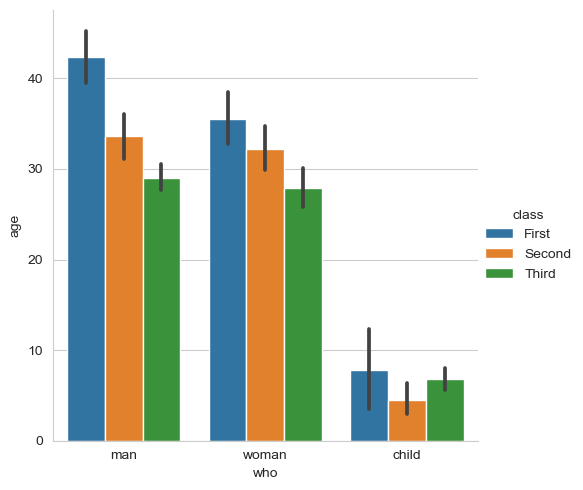

In [40]:
sns.catplot(x ='who' ,y = 'age', hue = 'class', kind = 'bar', data = data) # seaborn의 카테고리컬플롯
# who로 하면 man, women, child까지 나옴. 

In [45]:
data.groupby(['class','sex'])['fare'].mean().unstack() # 클래스와 성별에 따른 운임요금 가격 정도

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [46]:
data.groupby(['class','sex'])['fare'].mean().unstack()# 아이들은 운임요금이 더 비싸다.

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


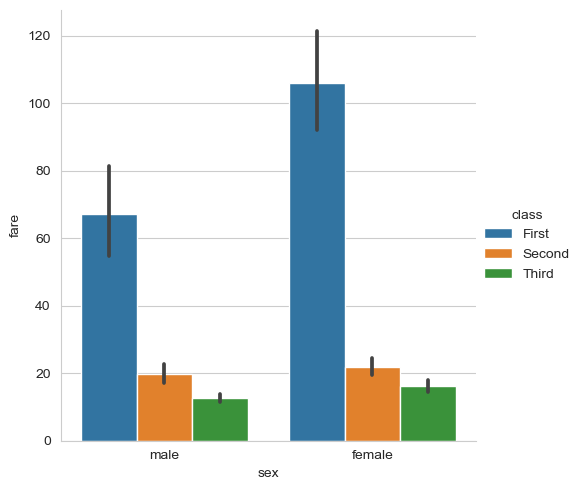

In [47]:
sns.catplot( x  = 'sex', y = 'fare', hue = 'class', kind = 'bar', data = data) # 위의 것을 시본으로 봄.

In [49]:
data.groupby(['class','sex'])['survived'].mean().unstack() 
# 클래스로 그룹화 하고 성별을 기준으로 생존 여부 확인-> 여자가 훨씬 많이 생존함.

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [50]:
data.pivot_table('survived', index = 'class', columns = 'sex')
# 바로 위의 것을 피벗테이블을 통해 나타낸것 (같은 결과임.)

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [52]:
data.pivot_table('survived', index = 'class', columns = 'who') # 2등급실 어린아이들은 전원 생존

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


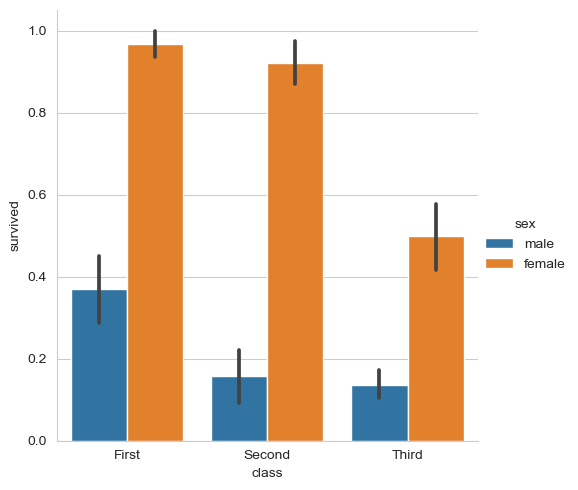

In [54]:
sns.catplot(x = 'class', y = 'survived', hue = 'sex', kind= 'bar', data = data)

In [56]:
# age를 0세부터 18세, 18세부터 40세, 40세 부터 80세로 나누어 성별과 등급별 생존율 확인
# cut = 어떤 기준으로 컬럼을 나눌 것인지
age = pd.cut(data['age'], [0,18,40,80]) 
data.pivot_table('survived', ['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [59]:
data.pivot_table('survived', index = 'who', columns = 'class', margins = True)
#  margins: pivot_table의 오른쪽 끝과 아래 끝에 총계와 같은 산식을 넣고 싶은 경우에는 True로 줌

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


In [60]:
data.pivot_table('survived', index = 'deck', columns = 'class', margins = True) # deck => 상판 같은걸 의미하나봄

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


<Axes: xlabel='count', ylabel='deck'>

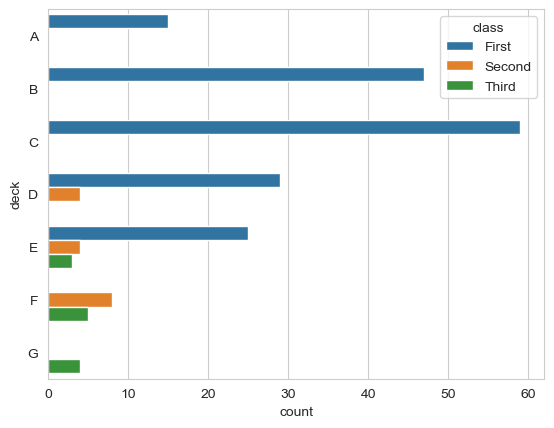

In [62]:
sns.countplot(y = 'deck', hue = 'class',data= data) # 클래스로 데크 구분

In [63]:
data.pivot_table('survived', index = 'embark_town', columns = 'class', margins = True) 
# 어느 곳에서 탔는지에 따른 생존 여부파악 // 큰 구분점이 없음.

class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


<Axes: xlabel='count', ylabel='embark_town'>

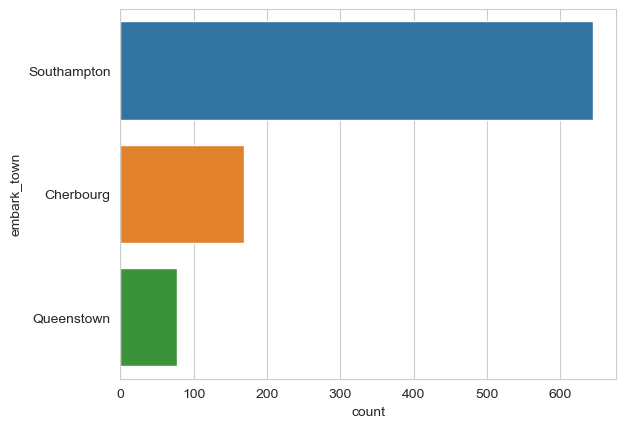

In [64]:
sns.countplot(y = 'embark_town', data = data) # 어디서 많이 탔는지

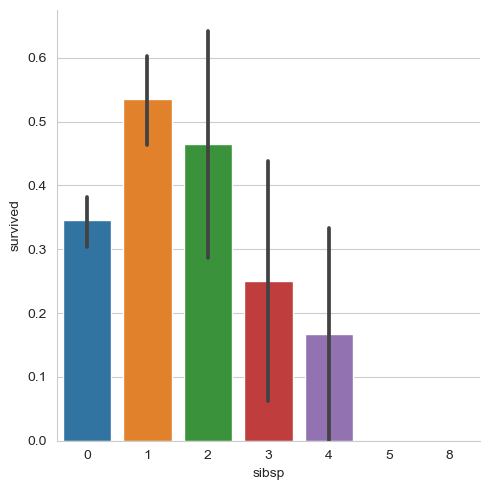

In [67]:
sns.catplot (x = 'sibsp', y = 'survived', kind = 'bar', data = data) 
# 형제자매의 숫자에 따른 생존여부 파악

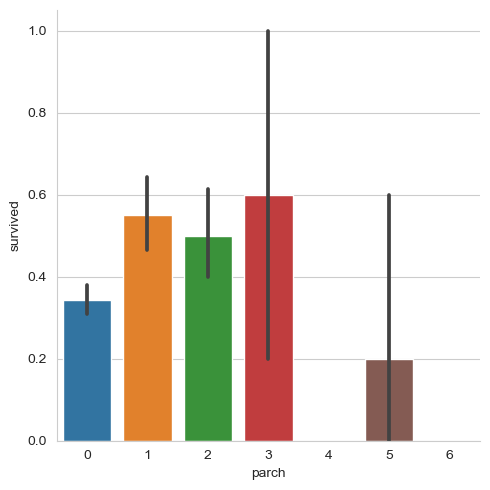

In [68]:
sns.catplot (x = 'parch', y = 'survived', kind = 'bar', data = data)
# 자녀수에 따른 생존여부

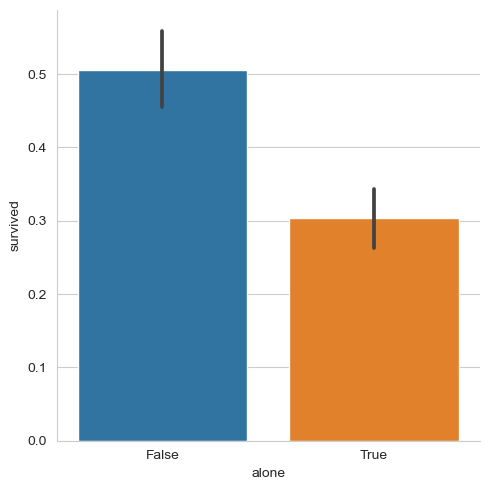

In [69]:
sns.catplot (x = 'alone', y = 'survived', kind = 'bar', data = data)
# 혼자 있는 경우 생존여부 (동반자가 있는 것이 생존을 더 많이 함.)